In [1]:
import sklearn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
advertising_data = pd.read_csv(r'C:\Users\Shaleen\Desktop\jpnb\DESIGNING\1.0\Advertising.csv')
advertising_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advertising_data.shape

(200, 5)

In [4]:
advertising_data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


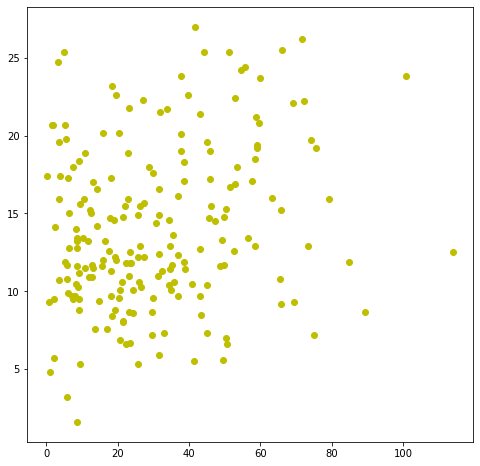

In [5]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising_data['newspaper'], advertising_data['sales'], c='y')

plt.show()

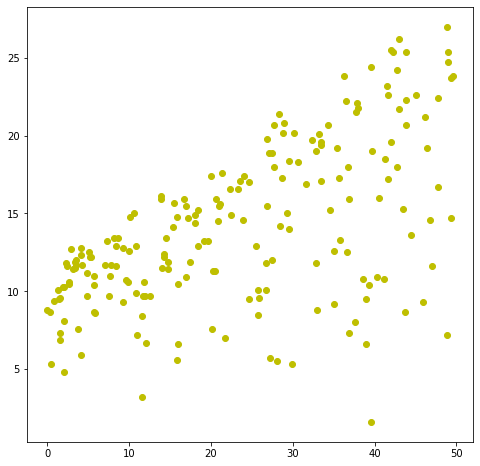

In [6]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising_data['radio'], advertising_data['sales'], c='y')

plt.show()

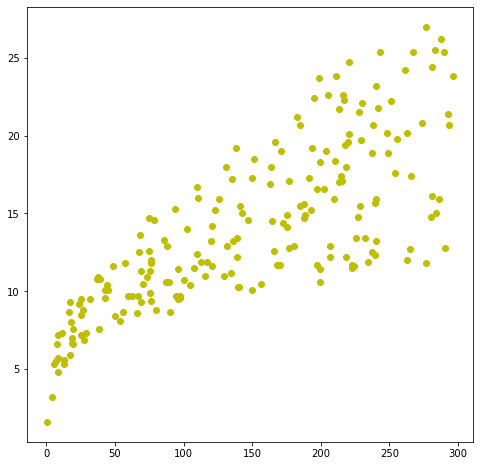

In [7]:
 plt.figure(figsize=(8, 8))

plt.scatter(advertising_data['TV'], advertising_data['sales'], c='y')

plt.show()

In [8]:
advertising_data_correlation = advertising_data.corr()

advertising_data_correlation

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [9]:
advertising_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
advertising_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
advertising_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
advertising_data.shape

(200, 4)

In [14]:
advertising_data_correlation = advertising_data.corr()

advertising_data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


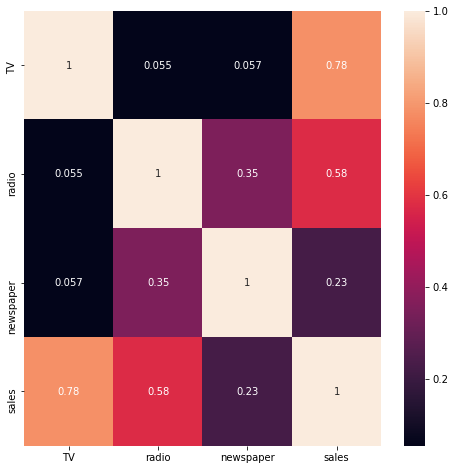

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(advertising_data_correlation, annot=True)

In [16]:
#simple regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [17]:
#form of a 2d array
X= advertising_data['TV'].values.reshape(-1, 1)
Y = advertising_data['sales'].values.reshape(-1, 1)

In [18]:
X.shape, Y.shape

((200, 1), (200, 1))

In [19]:
#split data in training and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [20]:
x_train.shape, y_train.shape

((140, 1), (140, 1))

In [21]:
x_test.shape, y_test.shape

((60, 1), (60, 1))

In [22]:
#perform regression annalyticly by fitting a formula
#add constant column to training data which corresponds to intercept
#OLS performes ordinary least squares regression, does so analytically by fitting a formula not by Ml techniques

import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           4.76e-26
Time:                        03:14:28   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

In [23]:
#instatiate LinearRegression estimator object from scikit-learn
#specify normalize=True as an input argument,this will center X data as 0 around mean
#it will subtract meean from all of x predictor values and divide by the l2 norm

linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)

linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
print('Training_score : ', linear_reg.score(x_train, y_train))

Training_score :  0.5552336104251212


In [26]:
y_pred = linear_reg.predict(x_test)

In [27]:
from sklearn.metrics import r2_score

print('Testing_score : ', r2_score(y_test, y_pred))

Testing_score :  0.725606346597073


In [30]:
#scikit-learn has no built-in function to calculate adjusted_r2 score

def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1-((1 - r_square) * (len(labels) -1)) / (len(labels) - features.shape[1])
    
    return adj_r_square

In [31]:
print('Adjusted_r2_score : ', adjusted_r2(r2_score(y_test, y_pred),y_test, x_test))

Adjusted_r2_score :  0.725606346597073


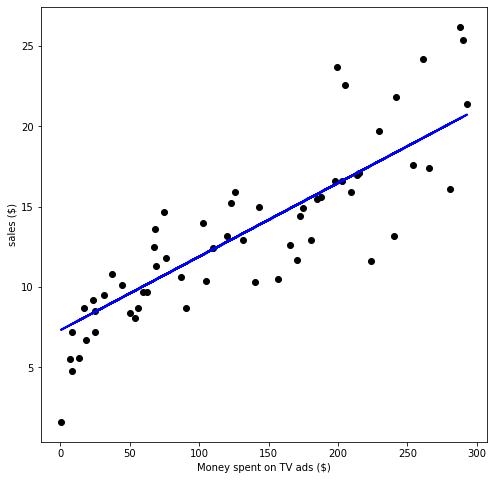

In [34]:
#to view how well regression line fits on underlying data
plt.figure(figsize=(8, 8))

plt.scatter(x_test,
           y_test,
           c='black')

plt.plot(x_test,
        y_pred,
        c='blue',
        linewidth=2)

plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('sales ($)')

plt.show()

In [35]:
#multiple regression

X = advertising_data.drop('sales', axis=1)
Y = advertising_data['sales']

In [36]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [37]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [39]:
x_train.shape, y_train.shape

((140, 3), (140,))

In [40]:
x_test.shape, y_test.shape

((60, 3), (60,))

In [41]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     363.8
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           9.39e-65
Time:                        03:51:43   Log-Likelihood:                -272.60
No. Observations:                 140   AIC:                             553.2
Df Residuals:                     136   BIC:                             565.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8241      0.382      7.386      0.0

In [42]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)

linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [43]:
print('Training_score : ', linear_reg.score(x_train, y_train))

Training_score :  0.889207658905077


In [44]:
y_pred = linear_reg.predict(x_test)

In [45]:
print('Testing_score : ', r2_score(y_test, y_pred))

Testing_score :  0.9079865922384387
